In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn import neural_network
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
print(dir(iris))
print(iris.data.shape)
print(iris.data[:5])
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

sc = StandardScaler()
sc.fit(iris.data)
iris.data = sc.transform(iris.data)
print(iris.data[:5])

['DESCR', 'data', 'feature_names', 'target', 'target_names']
(150, 4)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [142]:
X_train, X_test, y_train, y_test \
= train_test_split(iris.data, iris.target,test_size=0.3, random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(105, 4) (45, 4)
(105,) (45,)


In [143]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df["species"] = y_train
print(iris_df[:5])
print('tarin data',len(iris_df))
for (i,name) in enumerate(iris.target_names):
    print(name,len(iris_df[iris_df['species']==i]))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -1.021849         -2.438987          -0.147093         -0.261193   
1           0.795669         -0.124958           0.990221          0.790591   
2           1.038005          0.569251           1.103953          1.710902   
3           0.189830         -1.976181           0.705893          0.396172   
4           1.038005         -1.281972           1.160819          0.790591   

   species  
0        1  
1        2  
2        2  
3        2  
4        2  
tarin data 105
setosa 34
versicolor 32
virginica 39


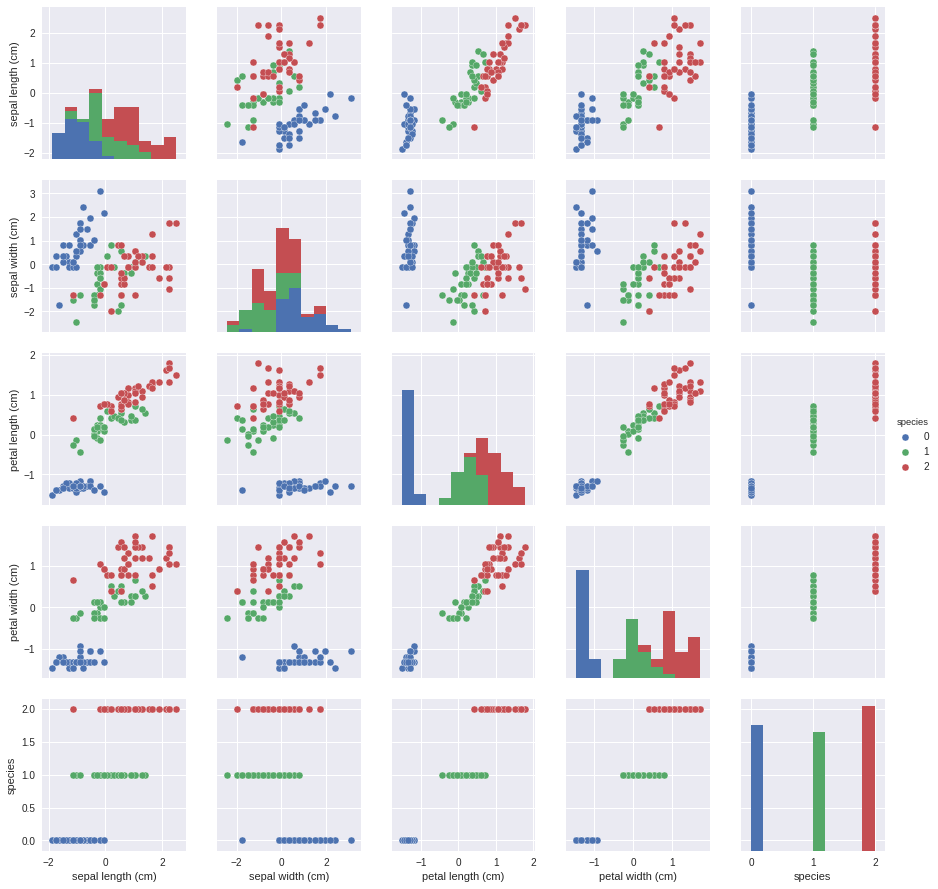

In [144]:
sns.pairplot(iris_df, hue='species')

In [145]:
## Drop the information on the sepal length and sepal width

X_train = X_train[:,2:]
X_test  = X_test[:,2:]
FeatureNames = iris.feature_names[2:]

(depth,train,test) = (1, 0.69524,0.60000)
(depth,train,test) = (2, 0.96190,0.91111)
(depth,train,test) = (3, 0.98095,0.97778)
(depth,train,test) = (4, 0.98095,0.97778)
(depth,train,test) = (5, 0.99048,0.95556)
(depth,train,test) = (6, 0.99048,0.95556)
(depth,train,test) = (7, 0.99048,0.95556)
(depth,train,test) = (8, 0.99048,0.95556)
(depth,train,test) = (9, 0.99048,0.95556)
(depth,train,test) = (10, 0.99048,0.95556)


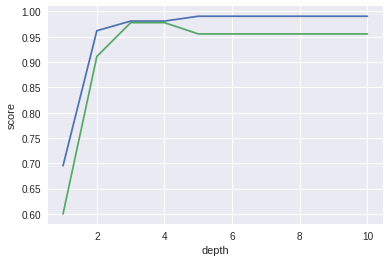

In [146]:
### Decision Tree Classifier ###

Depth = []
TrainACScore = []
TestACScore  = []
for i in range(10):
    depth = i+1
    Depth.append(depth)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    predict_train = clf.predict(X_train)
    TrainACScore.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(X_test)
    TestACScore.append(metrics.accuracy_score(y_test, predict_test))
    print("(depth,train,test) = ({0}, {1:.5f},{2:.5f})".format(depth,TrainACScore[i],TestACScore[i]))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("depth")
ax.set_ylabel("score")
ax.plot(Depth,TrainACScore,label="Train")
ax.plot(Depth,TestACScore,label="Test")
plt.show()
    

In [151]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
print('train score: {0:.5f}'.format(metrics.accuracy_score(y_train, predict_train)))
TrainACScore.append(metrics.accuracy_score(y_train, predict_train))
predict_test = clf.predict(X_test)
print('test score: {0:.5f}'.format(metrics.accuracy_score(y_test, predict_test)))

train score: 0.98095
test score: 0.97778


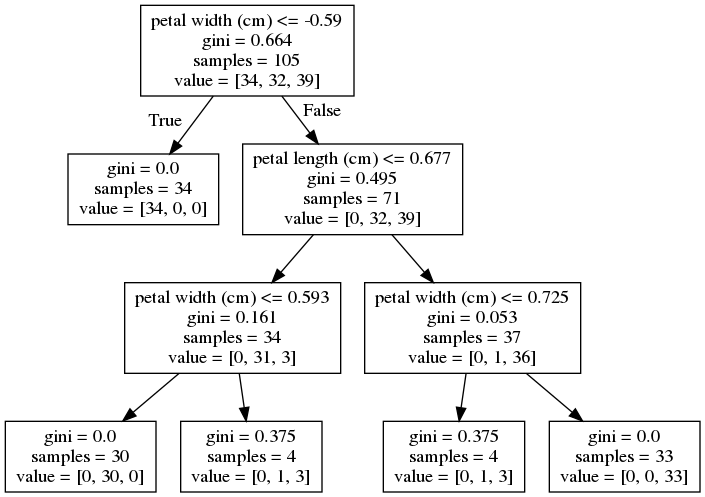

In [152]:
### Visualize the Decision Tree ###

from io import StringIO
import pydotplus
from IPython import display

data = StringIO()
tree.export_graphviz(clf, out_file=data, feature_names=FeatureNames)
graph = pydotplus.graph_from_dot_data(data.getvalue())

display.display(display.Image(graph.create_png()))

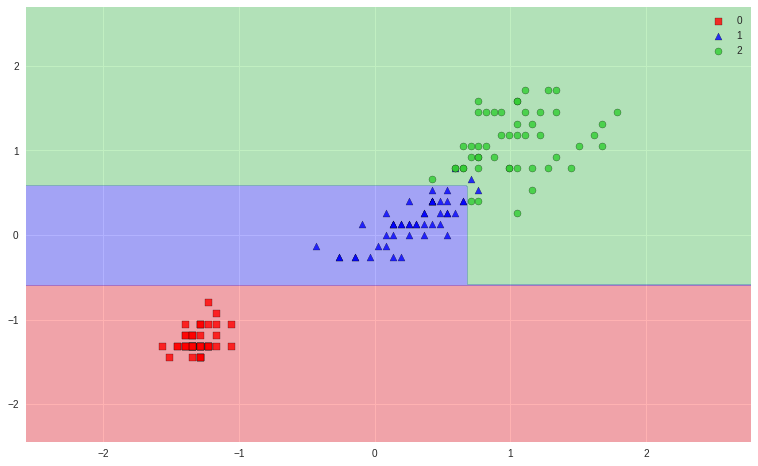

In [153]:
from mlxtend.plotting import plot_decision_regions


X_combined = np.concatenate((np.array(X_train), np.array(X_test)), axis=0)
y_combined = np.hstack((y_train, y_test))

#fet_value = {2: np.mean(X_train[:,2]),3: np.mean(X_train[:,3])}
fet_value = {2: 0.1,3: 0.1}
fet_value = {2: 1.1,3: 1.1}

#fet_range = {2: 5.0*np.std(X_train[:,2]),3: 5.0*np.std(X_train[:,3])}
#fet_range = {2: np.std(X_train[:,2]),3: np.std(X_train[:,3])}
#fet_range = {2: 0.1,3: 0.1}
#fet_range = {2: 5.0*np.std(X_train[:,2]),3: 5.0*np.std(X_train[:,3])}
fet_range = {2: 2.5,3: 2.5}
fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined, y_combined, clf=clf,  res=0.02,
                      #filler_feature_values=fet_value,
                      #filler_feature_ranges=fet_range
                     )
plt.show()

In [150]:
### SVM ###
clf = svm.SVC(kernel='rbf', C=10, gamma=0.2)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
print('train score: {0:.5f}'.format(metrics.accuracy_score(y_train, predict_train)))

predict_test = clf.predict(X_test)
print('test score: {0:.5f}'.format(metrics.accuracy_score(y_test, predict_test)))

train score: 0.95238
test score: 0.97778
